## Holiday Package Prediction Using Machine Learning-- Classification Problem

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("../data/Travel.csv")

In [3]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## 1.data cleaning

In [4]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [5]:
df["ProdTaken"].unique()

array([1, 0], dtype=int64)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [7]:
num_col=df.select_dtypes(include=np.number).columns
cat_col=df.select_dtypes(exclude=np.number).columns
num_col,cat_col

(Index(['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
        'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
        'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
        'NumberOfChildrenVisiting', 'MonthlyIncome'],
       dtype='object'),
 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
        'MaritalStatus', 'Designation'],
       dtype='object'))

In [8]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [9]:
for i in cat_col:
    print(df[i].value_counts())
    print('='*12)

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64
Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64
Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64
ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64
MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64
Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64


In [10]:
df["Gender"]=df["Gender"].replace('Fe Male', 'Female')
df['MaritalStatus']=df['MaritalStatus'].replace('Single', 'Unmarried')

In [11]:
# features with na
col_with_na=[col for col in df.columns if df[col].isnull().sum()>0]
for col in col_with_na:
    print(f"{col} has {df[col].isnull().sum()} missing value")

Age has 226 missing value
TypeofContact has 25 missing value
DurationOfPitch has 251 missing value
NumberOfFollowups has 45 missing value
PreferredPropertyStar has 26 missing value
NumberOfTrips has 140 missing value
NumberOfChildrenVisiting has 66 missing value
MonthlyIncome has 233 missing value


<Figure size 600x400 with 0 Axes>

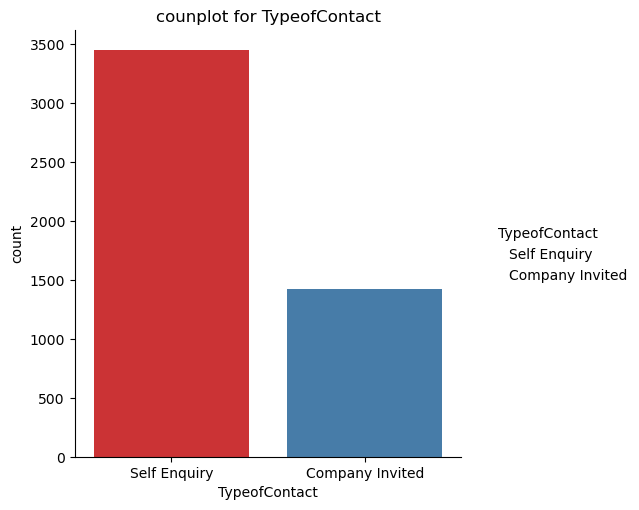

<Figure size 600x400 with 0 Axes>

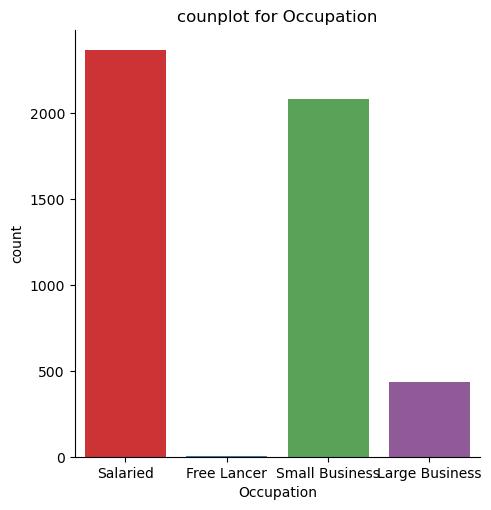

<Figure size 600x400 with 0 Axes>

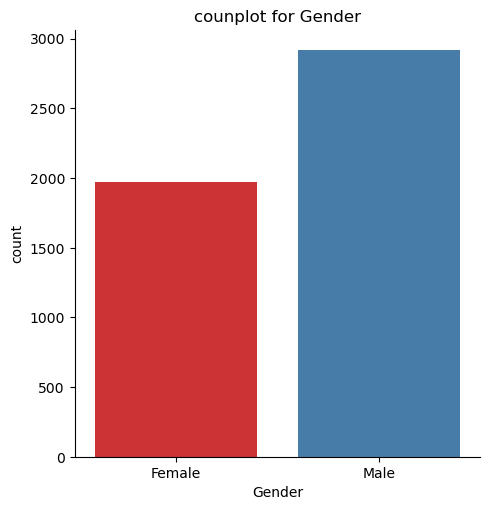

<Figure size 600x400 with 0 Axes>

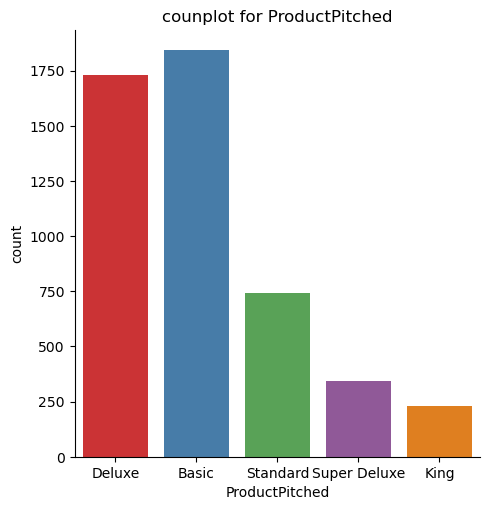

<Figure size 600x400 with 0 Axes>

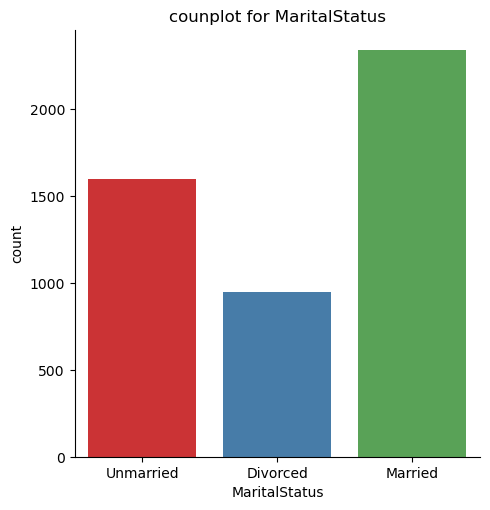

<Figure size 600x400 with 0 Axes>

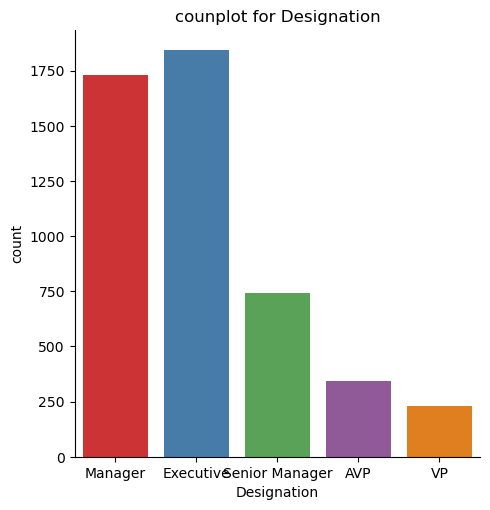

In [12]:
for col in cat_col:
    plt.figure(figsize=(6,4))
    sns.catplot(x=col,data=df, palette='Set1',kind='count')
    plt.title(f'counplot for {col}')

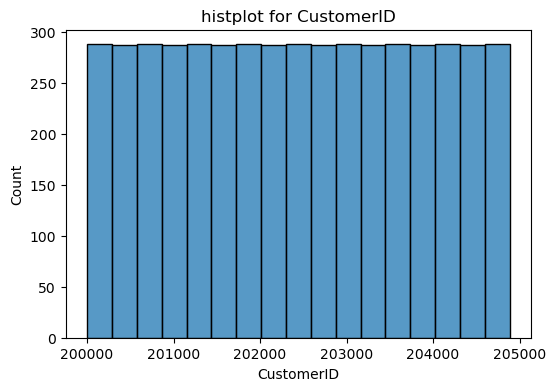

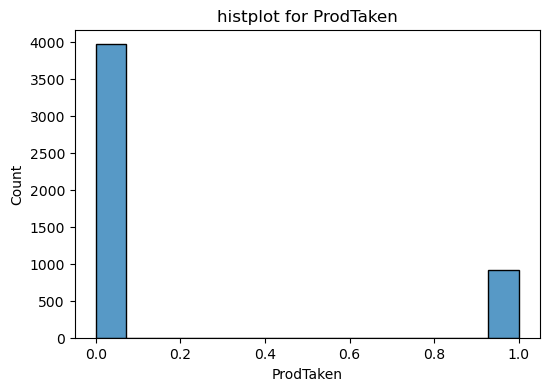

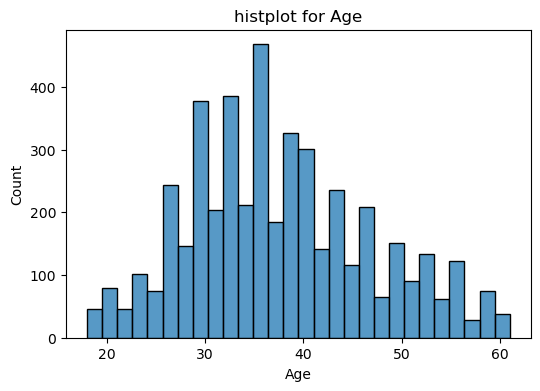

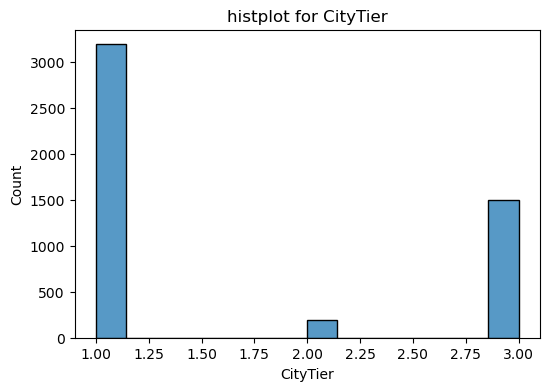

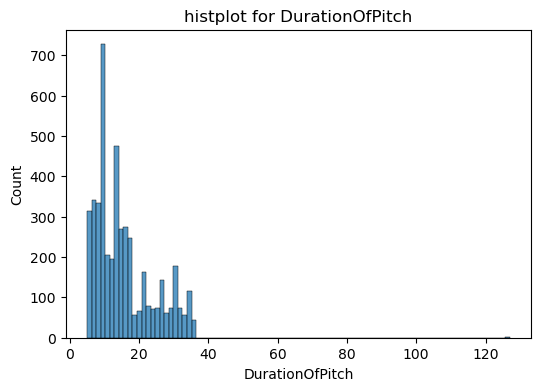

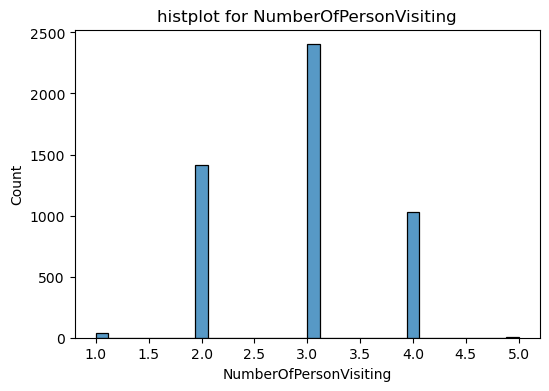

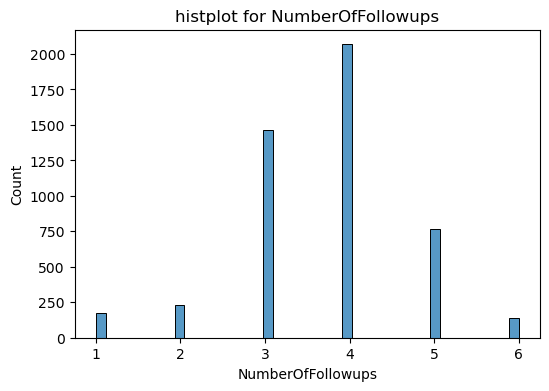

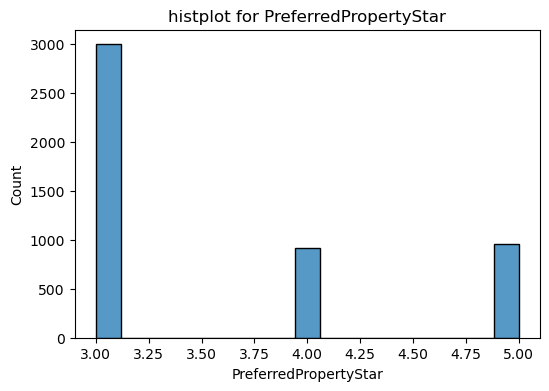

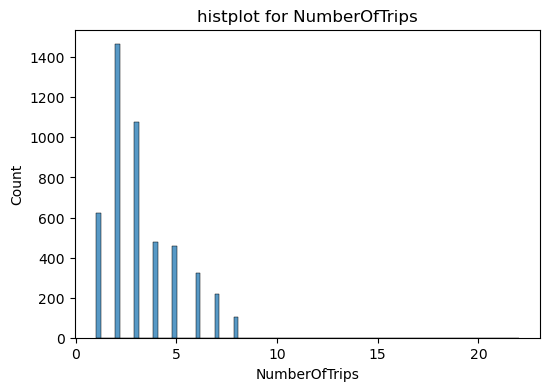

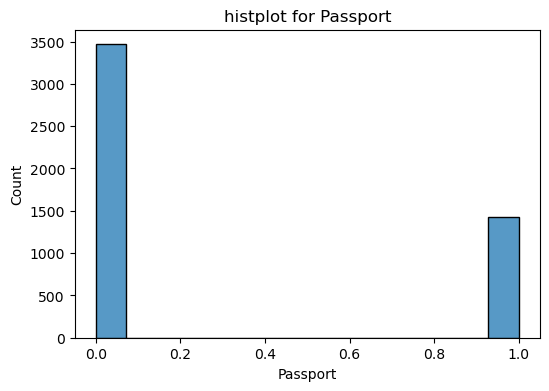

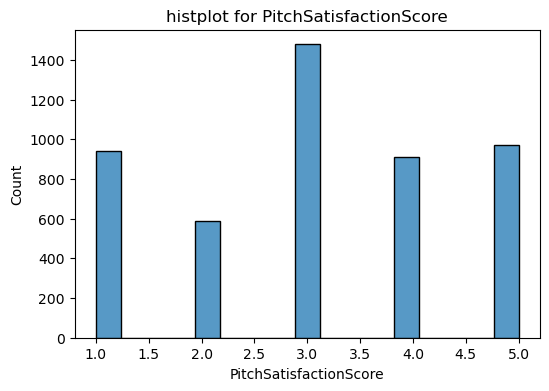

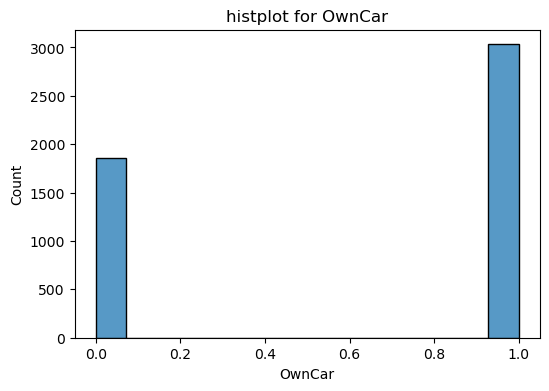

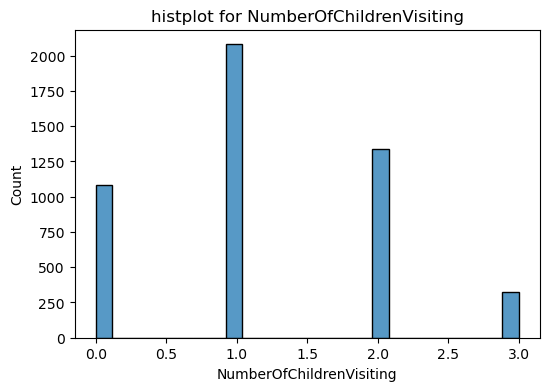

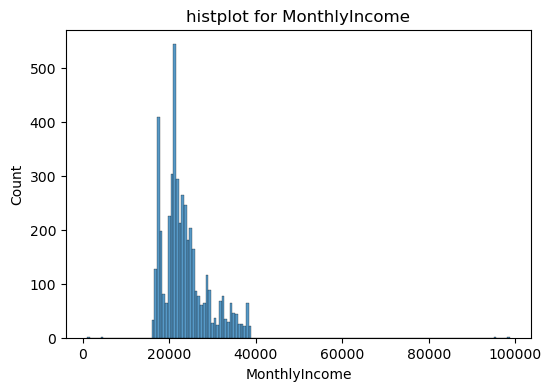

In [13]:
for col in num_col:
    plt.figure(figsize=(6,4))
    sns.histplot(x=col,data=df, palette='Set1')
    plt.title(f'histplot for {col}')

In [14]:
df[num_col].describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [15]:
df.drop(columns='CustomerID',inplace=True)

In [16]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [17]:
df["totalvisiting"]=df["NumberOfPersonVisiting"]+df["NumberOfChildrenVisiting"]

In [18]:
##
numeric_features=[col for col in df.columns if df[col].dtype !='O']
cat_features=[col for col in df.columns if df[col].dtype=='O']
discrete_features=[col for col in df.columns if df[col].nunique()<=25]
continous_features=[col for col in numeric_features if col not in discrete_features]

In [19]:
print(f"numeric_features: {numeric_features}")
print('=='*12)
print(f"cat_features: {cat_features}")
print('=='*12)
print(f"discrete_features: {discrete_features}")
print('=='*12)
print(f"continous_features: {continous_features}")


numeric_features: ['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome', 'totalvisiting']
cat_features: ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']
discrete_features: ['ProdTaken', 'TypeofContact', 'CityTier', 'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'totalvisiting']
continous_features: ['Age', 'DurationOfPitch', 'MonthlyIncome']


## 2.Model Training

In [21]:
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, recall_score, precision_score,
                             roc_auc_score, classification_report, confusion_matrix,
                             roc_curve)
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

In [22]:
X=df.drop(columns="ProdTaken")
y=df["ProdTaken"]

In [23]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

In [25]:
num_col 

Index(['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome'],
      dtype='object')

In [26]:
num_col = num_col.drop(["CustomerID","ProdTaken"])

In [27]:
num_col 

Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips',
       'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome'],
      dtype='object')

In [28]:
cate_pipe=Pipeline([
    ('cate_imputer',SimpleImputer(strategy="most_frequent")),
    ('onehot',OneHotEncoder(handle_unknown='ignore',sparse_output=False))
])

In [29]:
num_pipe=Pipeline([
    ('num_imputer',SimpleImputer(strategy="median")),
    ('scaler',StandardScaler())
])

In [30]:
preprocessor=ColumnTransformer(
    transformers=[
    ('num',num_pipe,num_col),
    ('cate',cate_pipe,cat_col)
],remainder='drop')

In [31]:
# Baseline Model
model={
    "logistic":LogisticRegression(class_weight="balanced", random_state=0,max_iter=1000),
    "DT":DecisionTreeClassifier(class_weight="balanced", random_state=0),
    "SVC": SVC(class_weight="balanced", random_state=0, probability=True),
    "Naive":GaussianNB(),
    "KNN":KNeighborsClassifier(n_jobs=-1),
    "RF":RandomForestClassifier(class_weight="balanced", random_state=0, n_jobs=-1),
    "Adaboost":AdaBoostClassifier(random_state=0),
    "GB":GradientBoostingClassifier(random_state=0),
    "XGB":XGBClassifier(random_state=0,n_jobs=-1)
    
}

In [376]:
# usinng cross validation to evaluate performance and return the cv score

In [33]:
scoring = {
    'accuracy': 'accuracy',
    'recall': 'recall',
    'precision': 'precision',
    'roc_auc': 'roc_auc'
}

In [34]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [35]:
baseline_results = []
for name,estimator in model.items():
    pipe = Pipeline([
     ('preprocessor', preprocessor),
     ('clf',estimator)
 ])
    scores = cross_validate(pipe, X_train, y_train, cv=cv, scoring=scoring, return_train_score=False, n_jobs=-1)
    baseline_results.append({
        'name': name,
        'accuracy_mean': np.mean(scores['test_accuracy']),
        'recall_mean': np.mean(scores['test_recall']),
        'precision_mean': np.mean(scores['test_precision']),
        'roc_auc_mean': np.mean(scores['test_roc_auc']),
        'estimator': estimator
    })

In [40]:
baseline_df = pd.DataFrame(baseline_results).sort_values(by="roc_auc_mean",ascending=False)
baseline_df

,name,accuracy_mean,recall_mean,precision_mean,roc_auc_mean,estimator
5,RF,0.899744,0.509561,0.925089,0.961937,RandomForestClassifier(class_weight='balanced'...
8,XGB,0.921995,0.690246,0.870154,0.939441,"XGBClassifier(base_score=None, booster=None, c..."
4,KNN,0.883887,0.494567,0.816279,0.909797,KNeighborsClassifier(n_jobs=-1)
2,SVC,0.851151,0.798906,0.575356,0.891762,"SVC(class_weight='balanced', probability=True,..."
7,GB,0.863939,0.413118,0.753016,0.865064,GradientBoostingClassifier(random_state=0)
1,DT,0.896419,0.707952,0.733467,0.824046,DecisionTreeClassifier(class_weight='balanced'...
6,Adaboost,0.844757,0.278516,0.733894,0.819142,AdaBoostClassifier(random_state=0)
0,logistic,0.750128,0.745974,0.410826,0.818472,"LogisticRegression(class_weight='balanced', ma..."
3,Naive,0.819437,0.057060,0.806517,0.753435,GaussianNB()


### Here, we notice that Random Forest,Xgboost, KNN have better performance on training dataset, then we decide to do hyperparameter tuning of these models

## 3. Hyperparameter Tuning

In [41]:
models_params = {
    "RF": (
        RandomForestClassifier(random_state=0, n_jobs=-1),
        {
            
            "clf__n_estimators": [100, 200, 500],
            "clf__max_depth": [None, 10, 20],
            "clf__max_features": ["sqrt", "log2", 0.2, 0.5],
            "clf__min_samples_split": [2, 5, 10],
        }
    ),
    "XGB":(
        XGBClassifier(random_state=0, n_jobs=-1),
        {
        "clf__learning_rate":[0.3, 0.1, 0.05, 0.01],
        "clf__n_estimators":[100, 200, 300],
        "clf__max_depth":[3,5,7],
        "clf__subsample":[0.6, 0.8, 1.0],
        "clf__colsample_bytree":[0.6, 0.8, 1.0]
        }
    ),
    "KNN": (
        KNeighborsClassifier(),
        {
            "clf__n_neighbors": [3, 5, 7, 9, 11, 15],
            "clf__weights": ["uniform", "distance"],
            "clf__p": [1, 2],
            "clf__algorithm": ["auto", "kd_tree", "ball_tree", "brute"],
            "clf__leaf_size": [20, 30, 40]
        }

    )
    
}

In [43]:
tuning_result=[]
for name,(estimator,param_dist)in models_params.items():
    print(f"\n--- Tuning {name}----")
    smote_pipe=ImbPipeline([
        ('preprocessor',preprocessor),
        ('smote',SMOTE(random_state=42)),
        ('clf',estimator)
    ])
    rs=RandomizedSearchCV(estimator=smote_pipe, param_distributions=param_dist,cv=cv,scoring="roc_auc",n_jobs=-1, random_state=42)
    rs.fit(X_train,y_train)
    print("best params:", rs.best_params_)
    print('best cv score:' ,rs.best_score_)
    tuning_result.append({
        "name":name,
        "best_score":rs.best_score_,
        "best_param": rs.best_params_,
        "best_estimator":rs.best_estimator_
    })


--- Tuning RF----
best params: {'clf__n_estimators': 500, 'clf__min_samples_split': 2, 'clf__max_features': 'log2', 'clf__max_depth': 20}
best cv score: 0.9475252065705044

--- Tuning XGB----
best params: {'clf__subsample': 1.0, 'clf__n_estimators': 200, 'clf__max_depth': 7, 'clf__learning_rate': 0.1, 'clf__colsample_bytree': 1.0}
best cv score: 0.9392301548840992

--- Tuning KNN----
best params: {'clf__weights': 'distance', 'clf__p': 1, 'clf__n_neighbors': 5, 'clf__leaf_size': 20, 'clf__algorithm': 'kd_tree'}
best cv score: 0.9487273070935377


In [44]:
tuning_df=pd.DataFrame(tuning_result)
tuning_df

,name,best_score,best_param,best_estimator
0,RF,0.947525,"{'clf__n_estimators': 500, 'clf__min_samples_s...","(ColumnTransformer(transformers=[('num',\n ..."
1,XGB,0.939230,"{'clf__subsample': 1.0, 'clf__n_estimators': 2...","(ColumnTransformer(transformers=[('num',\n ..."
2,KNN,0.948727,"{'clf__weights': 'distance', 'clf__p': 1, 'clf...","(ColumnTransformer(transformers=[('num',\n ..."


In [45]:
 for idx, row in tuning_df.iterrows():
        name=row["name"]
        best_estimator=row["best_estimator"]
        
        print(f"\n====={name}=======")
        y_pred=best_estimator.predict(X_test)
        print("Classification Report:")
        print(classification_report(y_test,y_pred))
        
        print('Confusion Matrix:')
        print(confusion_matrix(y_test,y_pred))


=====RF=======
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       794
           1       0.89      0.65      0.75       184

    accuracy                           0.92       978
   macro avg       0.91      0.82      0.85       978
weighted avg       0.92      0.92      0.91       978

Confusion Matrix:
[[779  15]
 [ 64 120]]

=====XGB=======
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       794
           1       0.89      0.72      0.80       184

    accuracy                           0.93       978
   macro avg       0.92      0.85      0.88       978
weighted avg       0.93      0.93      0.93       978

Confusion Matrix:
[[778  16]
 [ 51 133]]

=====KNN=======
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       794
           1       0.77      0.88   

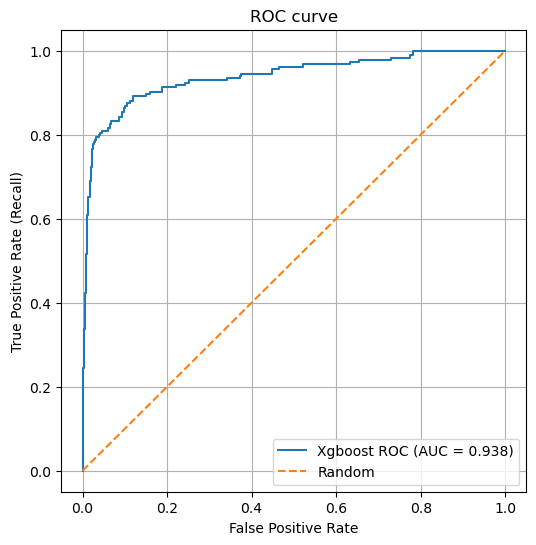

In [51]:
xgb_model=tuning_df.loc[1]["best_estimator"]
y_score=xgb_model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_score)
fpr,tpr,thr=roc_curve(y_test,y_score)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'Xgboost ROC (AUC = {auc:.3f})')
plt.plot([0,1], [0,1], linestyle='--', label='Random')  # random (0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()